#load libraries

In [1]:
!pip install catboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#load Data

In [3]:
df_train = pd.read_csv(r"/content/cs-training.csv")
df_train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [4]:
df_test = pd.read_csv(r"/content/cs-test.csv")
df_test

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


#Data Exploration and Cleaning

In [5]:
print(df_train.shape)
print(df_test.shape)

(150000, 12)
(101503, 12)


In [6]:
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
df_train.tail()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [8]:
df_train.sample(3)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
111531,111532,0,1.000000,29,0,0.000000,1912.0,0,0,0,0,0.0
76713,76714,0,0.000000,33,0,0.046942,6539.0,5,0,0,0,0.0
21840,21841,0,0.020921,71,0,485.000000,NaN,7,0,1,0,NaN


In [9]:
df_train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [11]:
df_train.isnull()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,False,False,False,False,False,False,False,False,False,False,False,False
149996,False,False,False,False,False,False,False,False,False,False,False,False
149997,False,False,False,False,False,False,True,False,False,False,False,False
149998,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df_train.isnull().sum()

,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [13]:
d = df_train.isnull().sum()
d[d>0]

,0
MonthlyIncome,29731
NumberOfDependents,3924


In [14]:
df_train['MonthlyIncome'].fillna(df_train['MonthlyIncome'].median(), inplace=True)
df_train['MonthlyIncome'].isnull().sum()

<ipython-input-14-4b38eb75978c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['MonthlyIncome'].fillna(df_train['MonthlyIncome'].median(), inplace=True)


np.int64(0)

In [15]:
df_train['NumberOfDependents'].fillna(0, inplace=True)
df_train['NumberOfDependents'].isnull().sum()

<ipython-input-15-af1f126de3b2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['NumberOfDependents'].fillna(0, inplace=True)


np.int64(0)

In [16]:
df_train.isnull().sum()

,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


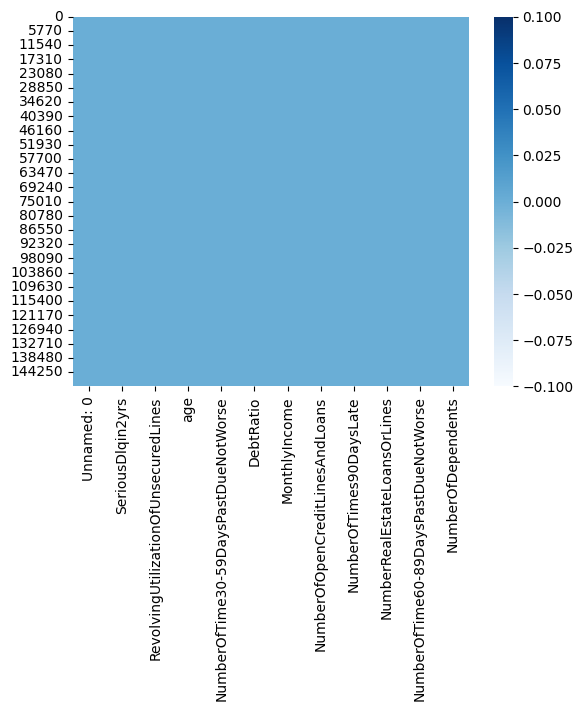

In [17]:
sns.heatmap(df_train.isnull(),cmap = "Blues")
plt.show()

In [18]:
d = df_test.isnull().sum()
d[d > 0]

,0
SeriousDlqin2yrs,101503
MonthlyIncome,20103
NumberOfDependents,2626


In [19]:
df_test['MonthlyIncome'].fillna(df_test['MonthlyIncome'].median(), inplace=True)
df_test['MonthlyIncome'].isnull().sum()

<ipython-input-19-7f884f2027e5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['MonthlyIncome'].fillna(df_test['MonthlyIncome'].median(), inplace=True)


np.int64(0)

In [20]:
df_test['NumberOfDependents'].fillna(0, inplace=True)
df_test['NumberOfDependents'].isnull().sum()

<ipython-input-20-50f882d873e1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['NumberOfDependents'].fillna(0, inplace=True)


np.int64(0)

In [21]:
df_test.drop(['SeriousDlqin2yrs'],axis = 1, inplace=True)
df_test

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,0.081596,70,0,836.000000,5400.0,3,0,0,0,0.0
101501,101502,0.335457,56,0,3568.000000,5400.0,8,0,2,1,3.0


In [22]:
df_test.isnull().sum()

,0
Unnamed: 0,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


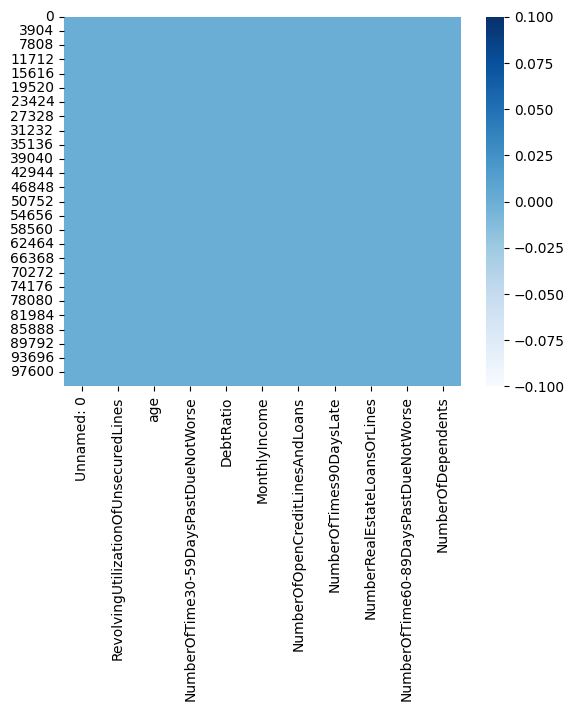

In [23]:
sns.heatmap(df_test.isnull(),cmap = "Blues")
plt.show()

In [24]:
df_train.duplicated().sum()

np.int64(0)

In [25]:
df_test.duplicated().sum()

np.int64(0)

#Data Analysis

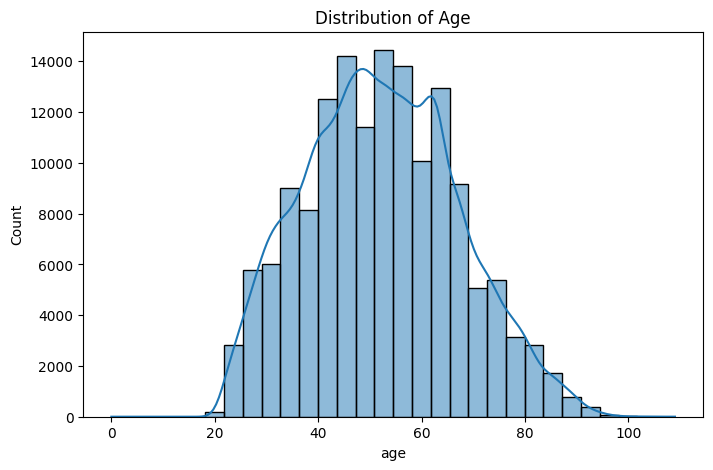

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df_train['age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.show()

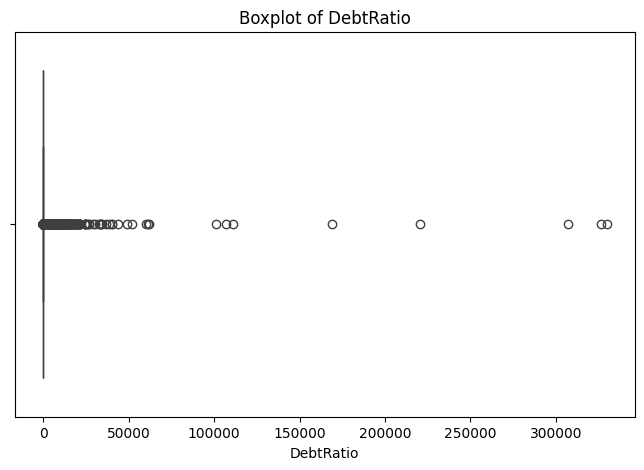

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['DebtRatio'])
plt.title("Boxplot of DebtRatio")
plt.show()

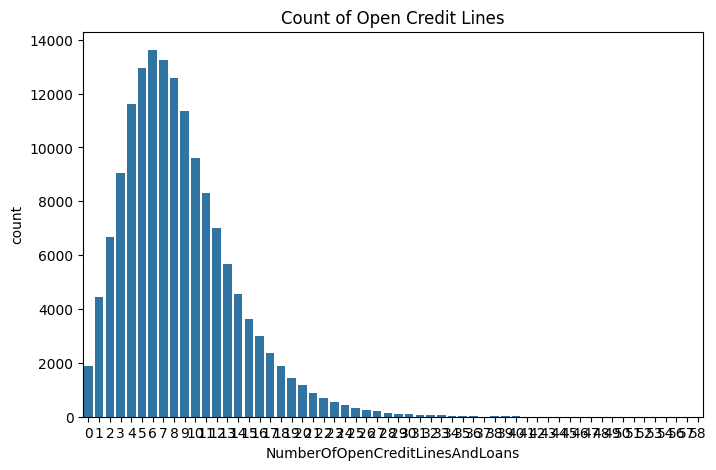

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_train['NumberOfOpenCreditLinesAndLoans'])
plt.title("Count of Open Credit Lines")
plt.show()

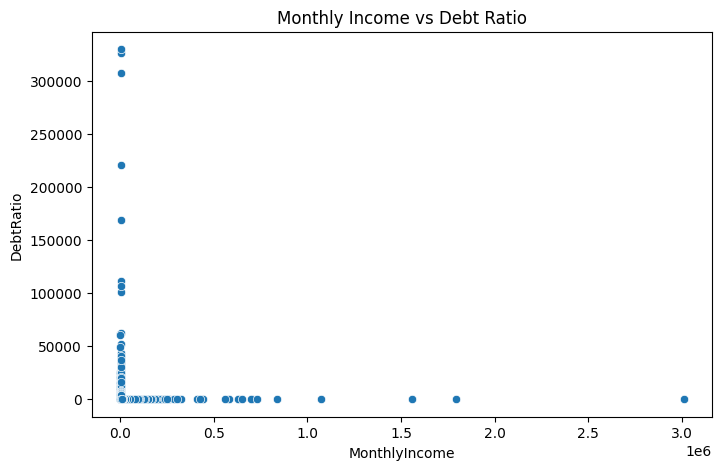

In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_train['MonthlyIncome'], y=df_train['DebtRatio'])
plt.title("Monthly Income vs Debt Ratio")
plt.show()

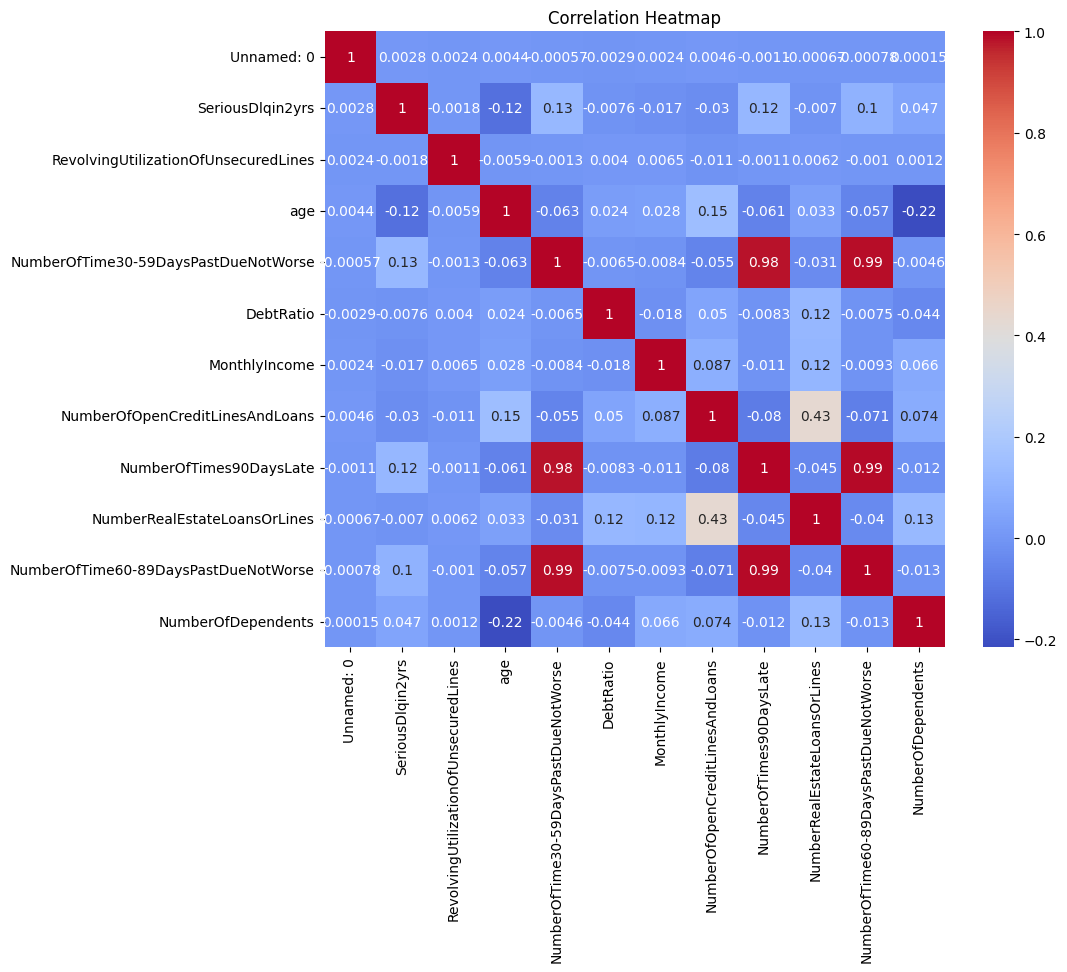

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

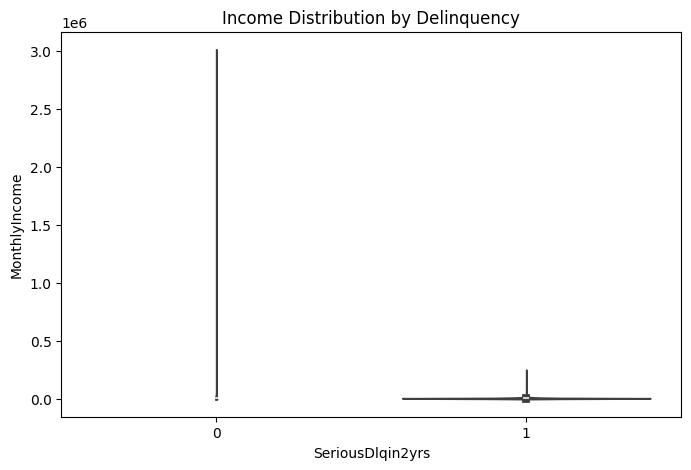

In [31]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df_train['SeriousDlqin2yrs'], y=df_train['MonthlyIncome'])
plt.title("Income Distribution by Delinquency")
plt.show()

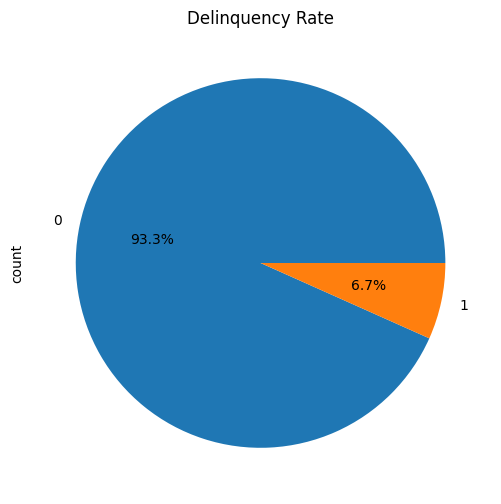

In [32]:
plt.figure(figsize=(6, 6))
df_train['SeriousDlqin2yrs'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Delinquency Rate")
plt.show()

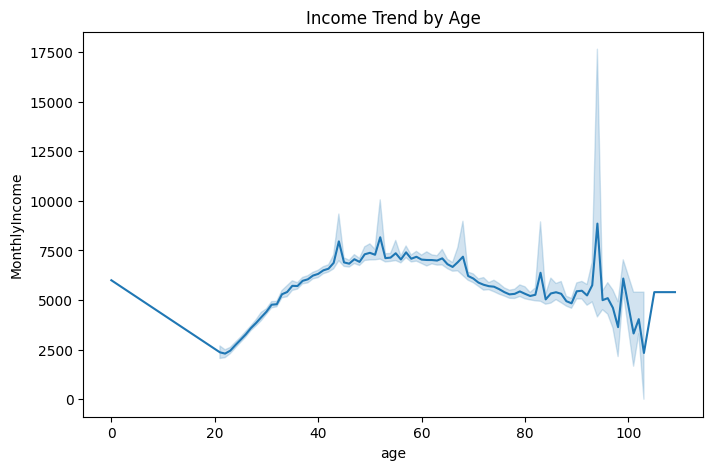

In [33]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=df_train['age'], y=df_train['MonthlyIncome'])
plt.title("Income Trend by Age")
plt.show()

<ipython-input-34-81dc71c91bf7>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train['DebtRatio'], shade=True)


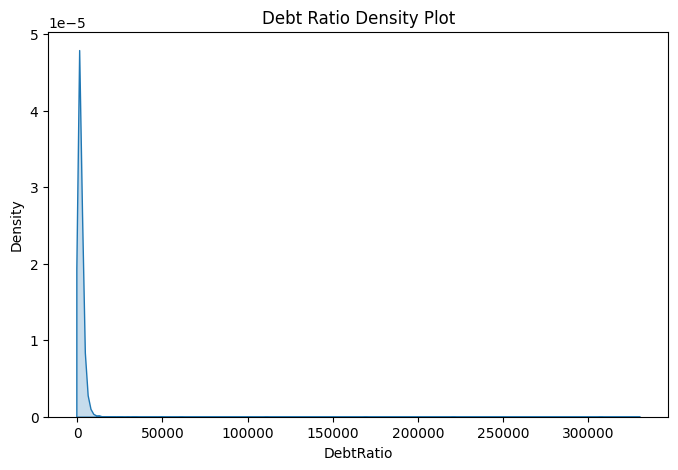

In [34]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df_train['DebtRatio'], shade=True)
plt.title("Debt Ratio Density Plot")
plt.show()

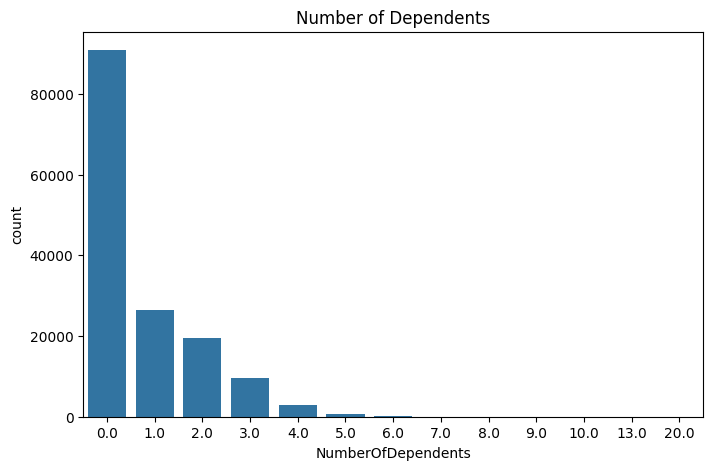

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_train['NumberOfDependents'])
plt.title("Number of Dependents")
plt.show()

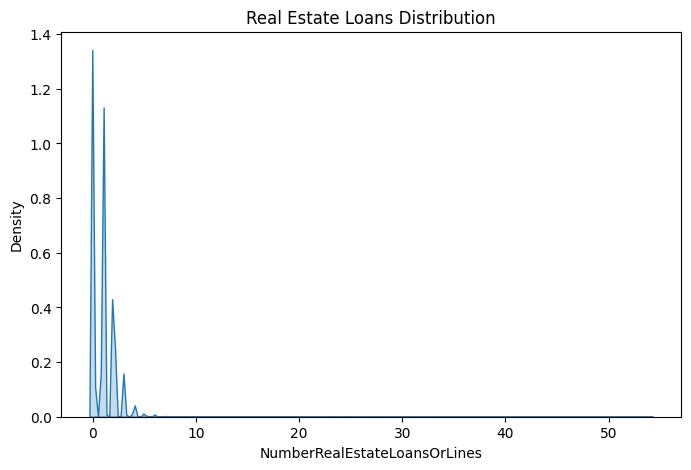

In [36]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df_train['NumberRealEstateLoansOrLines'], fill=True)
plt.title("Real Estate Loans Distribution")
plt.show()

#Delete Features

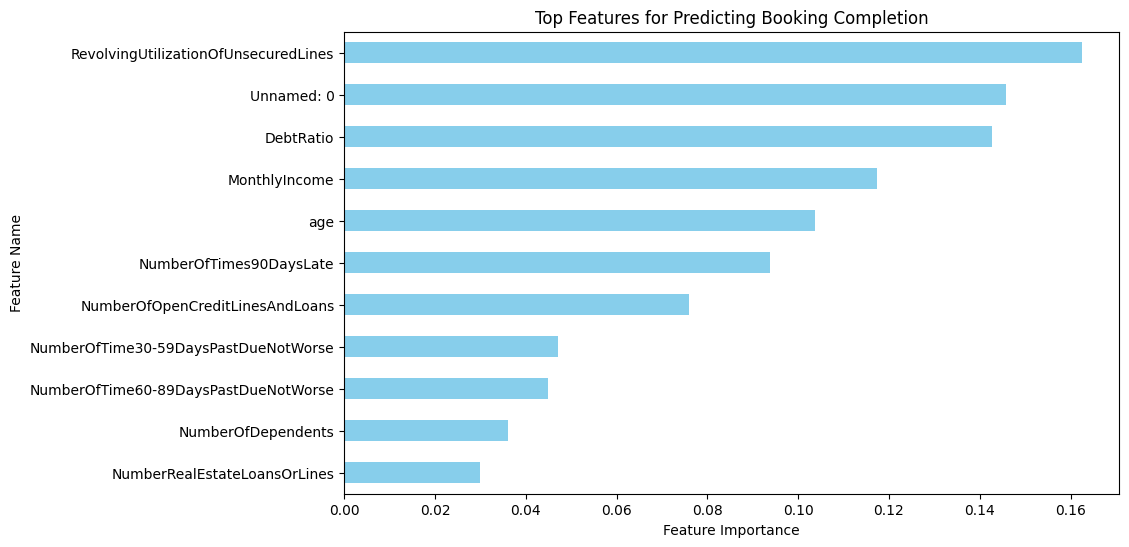

In [37]:
X = df_train.drop('SeriousDlqin2yrs', axis=1)
y = df_train['SeriousDlqin2yrs']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top Features for Predicting Booking Completion')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

In [38]:
df_train.drop(["NumberOfTime30-59DaysPastDueNotWorse","NumberOfTime60-89DaysPastDueNotWorse",
               "NumberOfDependents","NumberRealEstateLoansOrLines"],axis = 1 , inplace = True)

In [39]:
df_train.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate'],
      dtype='object')

# Create Model

In [40]:
df_train['SeriousDlqin2yrs'].value_counts()

,count
SeriousDlqin2yrs,
0,139974
1,10026


In [41]:
X = df_train.drop("SeriousDlqin2yrs", axis=1)
y = df_train["SeriousDlqin2yrs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,
                                        shuffle = True)

smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rus = RandomUnderSampler(sampling_strategy={0: 10026, 1: 10026}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_smote, y_train_smote)

print("Class distribution after balancing:")
print(y_resampled.value_counts().to_frame(name="count"))

Class distribution after balancing:
                  count
SeriousDlqin2yrs       
0                 10026
1                 10026


In [49]:
model1 = LogisticRegression()
model2 = GaussianNB()
model3 = MLPClassifier()
model4 = RandomForestClassifier()
model5 = DecisionTreeClassifier()
model6 = GradientBoostingClassifier()
model7 = XGBClassifier()
model8 = SVC()
model9 = CatBoostClassifier()

In [50]:
accuracies = []

def all(model):
    model.fit(X_resampled,y_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    print("accuracy =",accuracy)
    accuracies.append(accuracy)


all(model1)
all(model2)
all(model3)
all(model4)
all(model5)
all(model6)
all(model7)
all(model8)
all(model9)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy = 0.7656
accuracy = 0.19726666666666667
accuracy = 0.15244444444444444
accuracy = 0.7710888888888889
accuracy = 0.7116222222222223
accuracy = 0.7565111111111111
accuracy = 0.7678222222222222
accuracy = 0.3025111111111111
Learning rate set to 0.037064
0:	learn: 0.6758338	total: 54.5ms	remaining: 54.4s
1:	learn: 0.6601730	total: 61.1ms	remaining: 30.5s
2:	learn: 0.6458690	total: 67.8ms	remaining: 22.5s
3:	learn: 0.6342295	total: 74.3ms	remaining: 18.5s
4:	learn: 0.6220810	total: 80.8ms	remaining: 16.1s
5:	learn: 0.6112075	total: 87.4ms	remaining: 14.5s
6:	learn: 0.6010568	total: 93.8ms	remaining: 13.3s
7:	learn: 0.5914976	total: 100ms	remaining: 12.4s
8:	learn: 0.5842156	total: 107ms	remaining: 11.8s
9:	learn: 0.5762192	total: 114ms	remaining: 11.2s
10:	learn: 0.5688570	total: 120ms	remaining: 10.8s
11:	learn: 0.5622964	total: 127ms	remaining: 10.4s
12:	learn: 0.5557599	total: 133ms	remaining: 10.1s
13:	learn: 0.5514273	total: 140ms	remaining: 9.86s
14:	learn: 0.5462908	total: 1

In [51]:
algorithms = ["LogisticRegression","GaussianNB","MLPClassifier","RandomForestClassifier",
              " DecisionTreeClassifier","GradientBoostingClassifier","XGBClassifier","SVC",
              "CatBoostClassifier"]
results = pd.DataFrame({"algorithms":algorithms,"accuracies":accuracies})
results

,algorithms,accuracies
0,LogisticRegression,0.765600
1,GaussianNB,0.197267
2,MLPClassifier,0.152444
3,RandomForestClassifier,0.771089
4,DecisionTreeClassifier,0.711622
5,GradientBoostingClassifier,0.756511
6,XGBClassifier,0.767822
7,SVC,0.302511
8,CatBoostClassifier,0.769978


In [52]:
modelx = CatBoostClassifier()
modelx.fit(X_resampled,y_resampled)
prex = modelx.predict(X_test)
accuracy_score(prex,y_test)

Learning rate set to 0.037064
0:	learn: 0.6758338	total: 53.5ms	remaining: 53.5s
1:	learn: 0.6601730	total: 91.3ms	remaining: 45.6s
2:	learn: 0.6458690	total: 133ms	remaining: 44.3s
3:	learn: 0.6342295	total: 173ms	remaining: 43.1s
4:	learn: 0.6220810	total: 212ms	remaining: 42.1s
5:	learn: 0.6112075	total: 252ms	remaining: 41.8s
6:	learn: 0.6010568	total: 292ms	remaining: 41.5s
7:	learn: 0.5914976	total: 327ms	remaining: 40.6s
8:	learn: 0.5842156	total: 374ms	remaining: 41.1s
9:	learn: 0.5762192	total: 419ms	remaining: 41.5s
10:	learn: 0.5688570	total: 460ms	remaining: 41.3s
11:	learn: 0.5622964	total: 515ms	remaining: 42.4s
12:	learn: 0.5557599	total: 543ms	remaining: 41.2s
13:	learn: 0.5514273	total: 587ms	remaining: 41.4s
14:	learn: 0.5462908	total: 643ms	remaining: 42.2s
15:	learn: 0.5407475	total: 697ms	remaining: 42.9s
16:	learn: 0.5368869	total: 753ms	remaining: 43.5s
17:	learn: 0.5330243	total: 809ms	remaining: 44.1s
18:	learn: 0.5294539	total: 850ms	remaining: 43.9s
19:	learn

0.7699777777777778

In [53]:
print(modelx.score(X_test,y_test))
print(modelx.score(X_resampled,y_resampled))

0.7699777777777778
0.8405146618791143


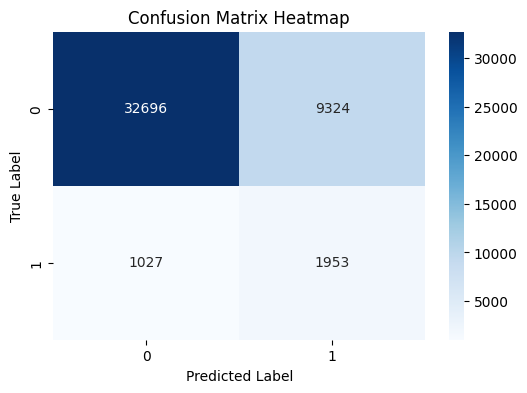

In [54]:
cm = confusion_matrix(y_test, prex)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [55]:
cr = classification_report(y_test, prex)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.78      0.86     42020
           1       0.17      0.66      0.27      2980

    accuracy                           0.77     45000
   macro avg       0.57      0.72      0.57     45000
weighted avg       0.92      0.77      0.82     45000



In [56]:
prexx = modelx.predict(df_test)
prexx

array([1, 0, 0, ..., 0, 1, 0])